<a href="https://colab.research.google.com/github/JuaoSA/Como-montar-seu-README/blob/master/Relat%C3%B3rio_de_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('ggplot')

In [88]:
#carregando bibliotecas
import numpy as np
import pandas as pd

# Importando dados
data=pd.read_csv("desafio_manutencao_preditiva_treino.csv")

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


In [41]:
data.apply(lambda x: x.nunique())


udi                      6667
product_id               6667
type                        3
air_temperature_k          93
process_temperature_k      82
rotational_speed_rpm      840
torque_nm                 547
tool_wear_min             243
failure_type                6
dtype: int64

In [117]:
#tirando product_id
data.drop("product_id",axis = 1, inplace = True )
#tirando  udi
data.drop("udi",axis =1, inplace = True )

In [43]:
data.isnull().sum()

type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
failure_type             0
dtype: int64

In [44]:
data.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.2,308.7,1408,40.0,9,No Failure
3,M,298.1,308.6,1425,41.9,11,No Failure
4,L,298.1,308.6,1558,42.4,14,No Failure


Estatísticas descritivas das colunas

In [77]:
data.describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,299.992515,309.992620,1537.419529,40.058512,108.098095
std,1.994710,1.488101,177.182908,9.950804,63.359915
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,251.000000


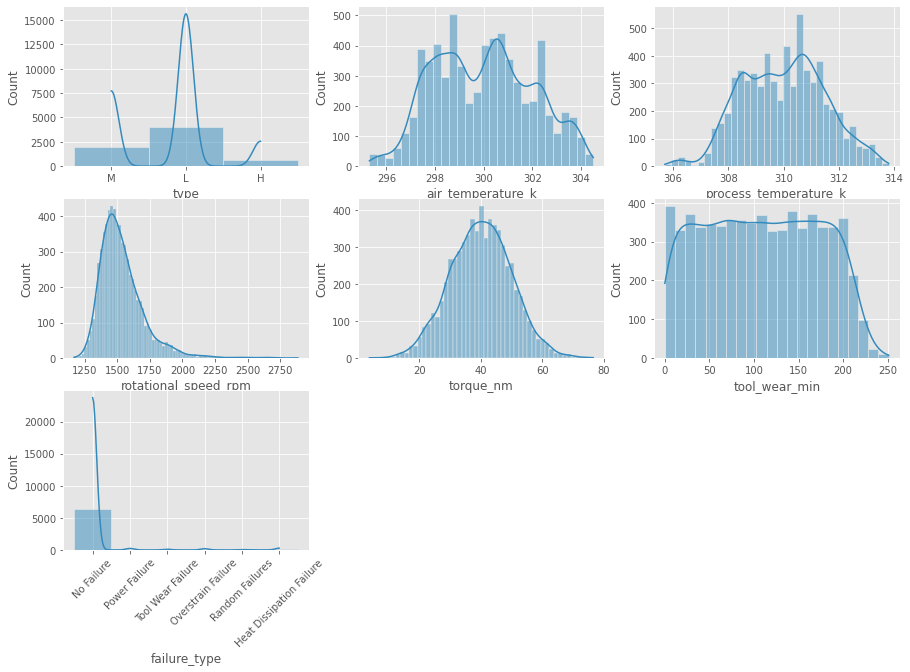

In [118]:
# Plot  histogramas das Colunas 
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(3,3,i)        
    if col == 'failure_type':
        plt.xticks(rotation=45)
    sns.histplot(data[col],kde=True)   


Os boxplots mostram a mediana, quartis e outliers dos dados, permitindo uma visualização geral da distribuição dos dados.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

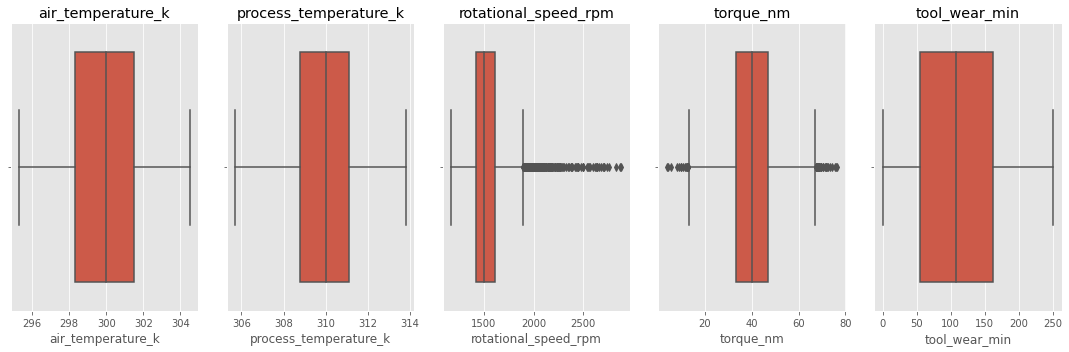

In [113]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
sns.boxplot(data['air_temperature_k'])
plt.title("air_temperature_k")

plt.subplot(1, 5, 2)
sns.boxplot(data['process_temperature_k'])
plt.title("process_temperature_k")

plt.subplot(1, 5, 3)
sns.boxplot(data['rotational_speed_rpm'])
plt.title("rotational_speed_rpm")

plt.subplot(1, 5, 4)
sns.boxplot(data['torque_nm'])
plt.title("torque_nm")

plt.subplot(1, 5, 5)
sns.boxplot(data['tool_wear_min'])
plt.title("tool_wear_min")

plt.tight_layout()
plt.show()
